In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

# Data Manipulation

In [2]:
#import csv of premier league defensive stats from fbref. I have uploaded the data but I changed the column names in the csv prior.
df = pd.read_csv(r"C:\\Users\josep\Downloads\Prem PLayers - Sheet1.csv")

In [3]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-225,1997,11.6,0.69,0.34,...,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,3,Che Adams\Che-Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-132,1987,3.0,0.00,0.00,...,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,517,Andi Zeqiri\Andi-Zeqiri,ch SUI,DFFW,Brighton,21-327,1999,1.5,2.00,2.00,...,0.67,6.00,5.33,8.67,6.67,1.33,0.00,2.00,0.67,0.00
517,518,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,24-151,1996,14.4,1.46,0.90,...,0.97,2.99,3.61,3.96,1.94,1.46,1.32,2.78,2.85,0.00
518,519,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,28-057,1993,12.7,0.79,0.55,...,1.18,4.80,3.70,7.09,6.61,1.10,0.71,1.50,0.08,0.00
519,520,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,26-200,1994,22.5,0.93,0.58,...,0.22,1.78,2.31,2.36,0.18,1.02,1.16,2.09,5.69,0.09


You can see from the table that the imported data set from FBref has a weird way of displaying the footballers name. The following code gets rid of the text that comes after the \

In [4]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
# displays the player names in a nicer way

In [5]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-225,1997,11.6,0.69,0.34,...,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,3,Che Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,5,Adrián,es ESP,GK,Liverpool,34-132,1987,3.0,0.00,0.00,...,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,517,Andi Zeqiri,ch SUI,DFFW,Brighton,21-327,1999,1.5,2.00,2.00,...,0.67,6.00,5.33,8.67,6.67,1.33,0.00,2.00,0.67,0.00
517,518,Oleksandr Zinchenko,ua UKR,DF,Manchester City,24-151,1996,14.4,1.46,0.90,...,0.97,2.99,3.61,3.96,1.94,1.46,1.32,2.78,2.85,0.00
518,519,Hakim Ziyech,ma MAR,FWMF,Chelsea,28-057,1993,12.7,0.79,0.55,...,1.18,4.80,3.70,7.09,6.61,1.10,0.71,1.50,0.08,0.00
519,520,Kurt Zouma,fr FRA,DF,Chelsea,26-200,1994,22.5,0.93,0.58,...,0.22,1.78,2.31,2.36,0.18,1.02,1.16,2.09,5.69,0.09


The player names are now displayed nicely. 

We only want to compare Joao Cancelo to *defenders* who have played more than 12 full matches. This limits the data to only players who play regularly for their clubs. Thus, the perctange calculated in the pizza plots will be relative to other defenders who start regularly for their teams. 

In [6]:
# only defenders and only those with more than 12 90's played 
df = df.loc[(df['Pos']=='DF') & (df['90s']>15)]
#recheck the dataframe
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
6,7,Ola Aina,ng NGA,DF,Fulham,24-219,1996,28.9,1.63,0.87,...,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
8,9,Semi Ajayi,ng NGA,DF,West Brom,27-187,1993,27.9,2.04,1.47,...,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07
12,13,Toby Alderweireld,be BEL,DF,Tottenham,32-074,1989,21.9,1.55,0.73,...,0.50,2.97,5.16,3.06,0.14,1.96,0.46,2.01,6.80,0.00


In [7]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born'],axis=1).reset_index()
# Drops any columns that we are not interested in to make the pizza plot 

In [8]:
df

,index,Player,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,0,Patrick van Aanholt,19.7,1.62,0.96,0.71,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,3,Tosin Adarabioyo,29.8,1.28,0.77,0.57,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
2,6,Ola Aina,28.9,1.63,0.87,0.59,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
3,8,Semi Ajayi,27.9,2.04,1.47,0.65,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07
4,12,Toby Alderweireld,21.9,1.55,0.73,0.59,0.50,2.97,5.16,3.06,0.14,1.96,0.46,2.01,6.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,489,Kyle Walker-Peters,26.7,2.92,1.57,0.94,1.12,4.38,7.68,5.09,1.46,2.28,1.42,4.34,2.40,0.04
85,490,Aaron Wan-Bissaka,33.0,2.94,1.58,0.64,0.58,4.09,5.82,5.06,1.94,3.36,1.97,4.91,3.21,0.00
86,491,Joel Ward,22.1,1.90,1.18,0.77,0.77,3.85,7.69,4.25,1.81,2.08,2.13,4.03,4.34,0.05
87,495,Adam Webster,25.8,1.05,0.70,0.50,0.47,2.87,3.10,3.06,0.85,1.71,1.47,2.52,4.11,0.00


In [9]:
# Creates a parameter list
params = list(df.columns)
params

['index',
 'Player',
 '90s',
 'Tackles',
 'Tkls Won',
 'Tkls vs Dribbles',
 'Dribbled Past',
 'Successful Pressures',
 'Def 3rd Press',
 'Mid 3rd Press',
 'Att 3rd Press',
 'Blocks',
 'Interceptions',
 'Tkl+Int',
 'Clearances',
 'Errors']

In [10]:
#drop the first 3 list item becuase we will not be using player,index, or 90s as a comparison metric
params = params[2:]
params

['90s',
 'Tackles',
 'Tkls Won',
 'Tkls vs Dribbles',
 'Dribbled Past',
 'Successful Pressures',
 'Def 3rd Press',
 'Mid 3rd Press',
 'Att 3rd Press',
 'Blocks',
 'Interceptions',
 'Tkl+Int',
 'Clearances',
 'Errors']

In [11]:
# Now we filter the df for the player we want. We will look at Joao Cancelo 
player = df.loc[df['Player']=='João Cancelo'].reset_index()
player = list(player.loc[0])
print(player)

[19, 80, 'João Cancelo', 25.4, 3.03, 1.69, 1.61, 1.89, 4.76, 5.35, 4.92, 2.99, 1.5, 2.05, 5.08, 1.42, 0.04]


In [12]:
df.Player.values

array(['Patrick van Aanholt', 'Tosin Adarabioyo', 'Ola Aina',
       'Semi Ajayi', 'Toby Alderweireld', 'Trent Alexander-Arnold',
       'Ezgjan Alioski', 'Joachim Andersen', 'Serge Aurier',
       'Luke Ayling', 'César Azpilicueta', 'George Baldock',
       'Kyle Bartley', 'Jan Bednarek', 'Héctor Bellerín', 'Ryan Bertrand',
       'Willy Boly', 'Dan Burn', 'Gary Cahill', 'João Cancelo',
       'Matty Cash', 'Timothy Castagne', 'Ben Chilwell',
       'Andreas Christensen', 'Ciaran Clark', 'Conor Coady',
       'Séamus Coleman', 'Liam Cooper', 'Vladimír Coufal',
       'Aaron Cresswell', 'Craig Dawson', 'Rúben Dias', 'Eric Dier',
       'Lucas Digne', 'Issa Diop', 'Gabriel Dos Santos', 'Lewis Dunk',
       'John Egan', 'Jonny Evans', 'Federico Fernández', 'Wesley Fofana',
       'Darnell Furlong', 'Ben Godfrey', 'Rob Holding', 'Mason Holgate',
       'Reece James', 'James Justin', 'Michael Keane', 'Ezri Konsa',
       'Cheikhou Kouyaté', 'Jamaal Lascelles', 'Jamal Lewis',
       'Victor

In [13]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

14
17 None
14
14 None


In [14]:
# We have the player scores, we need to calculate the percentile values with scipy stats.
# This will allow us to look at where Cancelo ranks in comparison to other defenders 
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [15]:
round(stats.percentileofscore(df[params[0]],player[0]))

54

In [16]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

# Data Visual Creation 

In [17]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

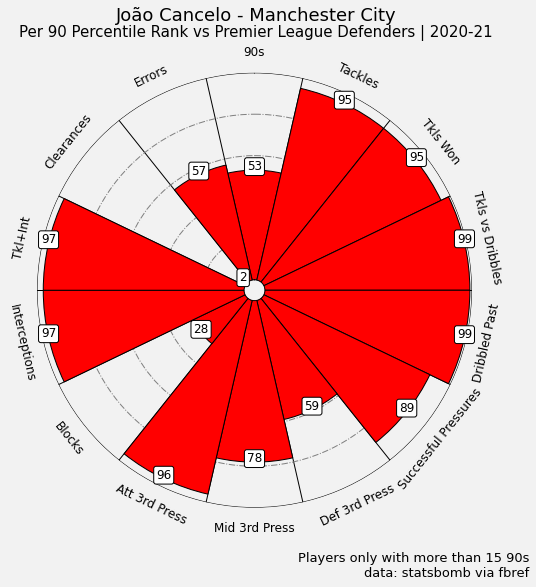

In [22]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="red", edgecolor="black",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="black", fontsize=12,
        va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="black", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="black", facecolor="white",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# Title
fig.text(0.515, 0.97, "João Cancelo - Manchester City", size=18, ha="center", color="#000000")

# Subtitle
fig.text(0.515, 0.942, "Per 90 Percentile Rank vs Premier League Defenders | 2020-21", size=15, ha="center", color="#000000")

# Notes
notes = 'Players only with more than 15 90s'
notes1 = "data: statsbomb via fbref"

fig.text(0.99, 0.005, f"{notes}\n{notes1}", size=13,color="#000000", ha="right")

plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')